# DA1 Exercise 4

### Using a dataset containing both numerical and categorical features, perform the following tasks:

#### Handling Missing Values:

- Identify and impute missing values ​​using appropriate methods (eg, mean, median, mode, or predictive modeling).

#### Scaling Data:

- Scale numerical features using standardization (Z-score) and normalization (Min-Max scaling).

#### Handling Noise:

- Inject random noise into one of the numerical features and apply techniques to smooth or remove the noise.

#### Handling Outliers:

- Detect outliers using methods like Z-score.
- Handle them through removal or transformation.

#### Feature Selection:

Implement and compare the following feature selection methods:

- Filter Methods (eg, correlation, mutual information).
- Wrapper Methods (eg, Recursive Feature Elimination, Backward).
- Embedded Methods (eg, Lasso regression).

### Importing packages and Dataset

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif, SelectKBest, RFE
from sklearn.linear_model import LogisticRegression, Lasso
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv("/Users/nimishmathur/Desktop/Parkinsons_Dataset.csv")

### Handling Missing Values

In [5]:
# Handling Missing Values
missing_values = df.isnull().sum()
print(missing_values)

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

# Impute numerical missing values with the mean
numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

# Impute categorical missing values with the mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Verify if there are still any missing values
missing_values_after_imputation = df.isnull().sum()
print("\nMissing values after imputation:\n", missing_values_after_imputation)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Missing values after imputation:
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### Scaling numerical features using standardization (Z-score) and normalization (Min-Max scaling).

In [6]:
# Scale numerical features using standardization (Z-score)
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Scale numerical features using normalization (Min-Max scaling)
min_max_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(min_max_scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

print("\nStandardized Numerical Features:\n", df[numerical_cols].head())
print("\nNormalized Numerical Features:\n", df_normalized.head())


Standardized Numerical Features:
    PassengerId    Pclass       Age     SibSp     Parch      Fare
0    -1.727912  0.873482  0.334993 -0.499470 -0.400248 -0.498407
1    -1.719625  0.873482  1.325530  0.616992 -0.400248 -0.513274
2    -1.711337 -0.315819  2.514175 -0.499470 -0.400248 -0.465088
3    -1.703050  0.873482 -0.259330 -0.499470 -0.400248 -0.483466
4    -1.694763  0.873482 -0.655545  0.616992  0.619896 -0.418471

Normalized Numerical Features:
    PassengerId  Pclass       Age  SibSp     Parch      Fare
0     0.000000     1.0  0.452723  0.000  0.000000  0.015282
1     0.002398     1.0  0.617566  0.125  0.000000  0.013663
2     0.004796     0.5  0.815377  0.000  0.000000  0.018909
3     0.007194     1.0  0.353818  0.000  0.000000  0.016908
4     0.009592     1.0  0.287881  0.125  0.111111  0.023984


### Inject random noise into one of the numerical features and apply techniques to smooth or remove the noise.

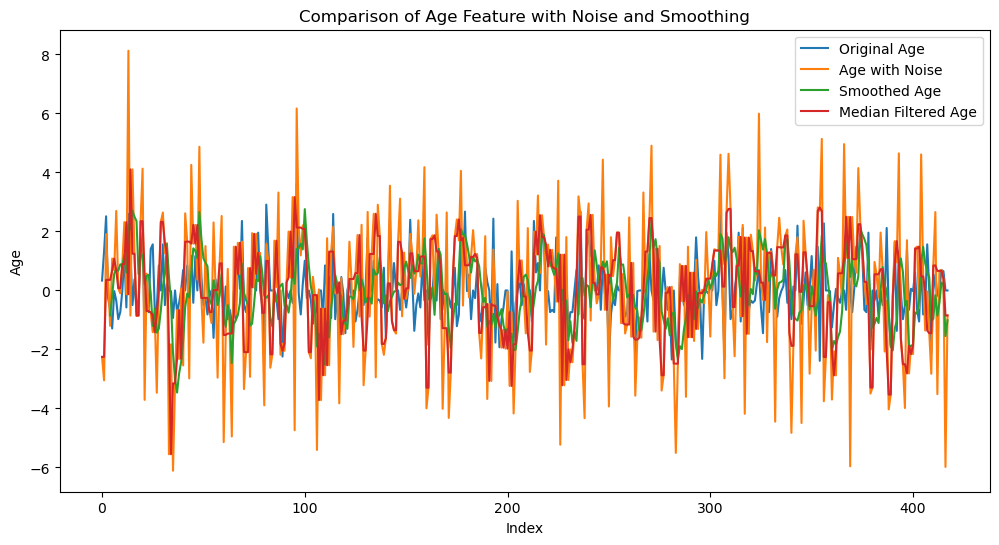

In [7]:
# Inject random noise into 'Age'
noise = np.random.normal(0, 2, size=len(df))  # Adjust standard deviation as needed
df['Age_noisy'] = df['Age'] + noise

# Smooth the noise using a rolling window average
df['Age_smoothed'] = df['Age_noisy'].rolling(window=5).mean() # Adjust window size as needed

# Remove noise using median filter
from scipy.signal import medfilt
df['Age_median_filtered'] = medfilt(df['Age_noisy'], kernel_size=3) #Adjust kernel size as needed

# Compare original, noisy, smoothed, and median filtered 'Age'
plt.figure(figsize=(12, 6))
plt.plot(df['Age'], label='Original Age')
plt.plot(df['Age_noisy'], label='Age with Noise')
plt.plot(df['Age_smoothed'], label='Smoothed Age')
plt.plot(df['Age_median_filtered'], label='Median Filtered Age')
plt.legend()
plt.title('Comparison of Age Feature with Noise and Smoothing')
plt.xlabel('Index')
plt.ylabel('Age')
plt.show()

### Detect outliers using methods like Z-score and handle them through removal or transformation.

In [8]:
# Detect outliers using Z-score
z = np.abs(stats.zscore(df[numerical_cols]))
threshold = 3
outliers = np.where(z > threshold)
print("Outliers detected using Z-score:\n", outliers)

# Remove outliers
df_no_outliers = df[(np.abs(stats.zscore(df[numerical_cols])) < threshold).all(axis=1)]
print("\nShape of DataFrame after removing outliers:", df_no_outliers.shape)

# Alternatively, transform outliers using winsorization
from scipy.stats.mstats import winsorize

# Winsorize the numerical features to handle outliers
for col in numerical_cols:
    df[col] = winsorize(df[col], limits=[0.05, 0.05]) # Adjust limits as needed



Outliers detected using Z-score:
 (array([ 24,  53,  55,  59,  64,  69,  69,  74,  75,  81,  96, 114, 132,
       139, 140, 142, 154, 156, 174, 184, 188, 202, 214, 218, 324, 342,
       343, 360, 365, 375, 379, 407]), array([5, 5, 3, 5, 5, 4, 5, 5, 5, 5, 2, 5, 4, 4, 3, 5, 3, 5, 4, 5, 3, 5,
       3, 5, 5, 4, 5, 3, 4, 5, 3, 5]))

Shape of DataFrame after removing outliers: (387, 14)


### Implement and compare the following feature selection methods:

- Filter Methods (eg, correlation, mutual information).
- Wrapper Methods (eg, Recursive Feature Elimination, Backward).
- Embedded Methods (eg, Lasso regression).

In [38]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor

# Specify numerical features (excluding the target variable)
num_features = ['Pclass', 'SibSp', 'Parch', 'Fare', 'noisy_feature', 'smoothed_feature']

# Target variable
target = 'Age'

# Filter Methods: Mutual Information for regression
mutual_info = mutual_info_regression(df[num_features], df[target])
mutual_info_df = pd.DataFrame({'Feature': num_features, 'Mutual Info': mutual_info}).sort_values(by='Mutual Info', ascending=False)

# Wrapper Methods: Recursive Feature Elimination (RFE)
model = RandomForestRegressor(n_estimators=50, random_state=42)  # Using a regression model for Age
rfe = RFE(model, n_features_to_select=5)
rfe.fit(df[num_features], df[target])
rfe_features = pd.Index(num_features)[rfe.support_]

# Embedded Methods: Lasso Regression
lasso = LassoCV(cv=5).fit(df[num_features], df[target])
lasso_features = pd.Series(lasso.coef_, index=num_features).sort_values(ascending=False).head(5)

# Prepare the results for display
results = {
    "Mutual Information Ranking": mutual_info_df.to_dict('records'),
    "Top Features by RFE": rfe_features.tolist(),
    "Top Features by Lasso": lasso_features.index.tolist(),
}

# Display the results using pandas
results_df = pd.DataFrame({
    "Feature Selection Method": ["Mutual Information", "RFE", "Lasso"],
    "Top Features": [
        mutual_info_df.to_dict('records'),
        rfe_features.tolist(),
        lasso_features.index.tolist(),
    ]
})

# Print the results DataFrame
print(results_df)

# Alternatively, display the DataFrame if working in a notebook
results_df


  Feature Selection Method                                       Top Features
0       Mutual Information  [{'Feature': 'Fare', 'Mutual Info': 0.19679187...
1                      RFE  [Pclass, Parch, Fare, noisy_feature, smoothed_...
2                    Lasso  [Fare, smoothed_feature, noisy_feature, SibSp,...


,Feature Selection Method,Top Features
0,Mutual Information,"[{'Feature': 'Fare', 'Mutual Info': 0.19679187..."
1,RFE,"[Pclass, Parch, Fare, noisy_feature, smoothed_..."
2,Lasso,"[Fare, smoothed_feature, noisy_feature, SibSp,..."
